Created by: Anisha Raghu and Ananya Raghu

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

We can start by loading our dataset and observing the first few rows.

In [ ]:
melbourne_df = pd.read_csv("melb_data.csv")

In [ ]:
melbourne_df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
melbourne_df.shape

(13580, 21)

The melbourne dataset has 13580 rows and 21 columns.

We can look at the names of the features and get a better feel for what our dataset is made of.

In [ ]:
print(list(melbourne_df.columns))

['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']


Features
Rooms: Number of rooms

Price: Price in dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size

BuildingArea: Building Size

CouncilArea: Governing council for the area

From https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot/

# 1. Methods Feature

We start by looking at the methods feature, and check to see if the method is unspecified.

In [ ]:
melbourne_df[melbourne_df["Method"] =="N/A"]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


Next, we can perform *categorical encoding* to convert the method column into numbers

In [ ]:
melbourne_df["Method"].replace({'S': 0, 'SP': 1,'PI':2, 'PN':3,'SN':4, 'NB':5, 'VB':6, 'W':7, 'SA':8, 'SS':9 }, inplace = True)

In [ ]:
melbourne_df[melbourne_df["Method"].isin([0,1,2,3,4,5,6,7,8,9])].shape

(13580, 21)

Looks like this worked for all the rows (same size of data is outputted!) We have successfully converted our method column to numbers

#2. Type feature

In [ ]:
melbourne_df["Type"].replace({'br': 0, 'h': 1,'u':2, 't':3,'dev site':4, 'o res':5}, inplace = True)

In [ ]:
melbourne_df[melbourne_df["Type"].isin([0,1,2,3,4,5])].shape

(13580, 21)

# 3. Drop

We drop below the SellerG, address, and suburb, CouncilArea and Regionname columns because we hypothesize that these are irrelevant.

In [ ]:
melbourne_df.drop(columns = ['SellerG', 'Address', 'Suburb', 'CouncilArea', 'Regionname'], inplace = True)
print(melbourne_df.shape)

(13580, 16)


#4. Split date into three columns with date, month, and year

We believe that property prices are normally seasonal, so we want to split the date into day, month and year - hence we create three different columns for them.

In [ ]:
melbourne_df['Date']
day_month_year = [date.split('/') for date in melbourne_df['Date']]

day_list = [int(element[0]) for element in day_month_year]
month_list = [int(element[1]) for element in day_month_year]
year_list = [int(element[2]) for element in day_month_year]
melbourne_df["Day"] = day_list
melbourne_df["Month"] = month_list
melbourne_df["Year"] = year_list

melbourne_df.drop(columns = ["Date"], inplace = True)

In [ ]:
melbourne_df.head()

,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Day,Month,Year
0,2,1,1480000.0,0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0,3,12,2016
1,2,1,1035000.0,0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0,4,2,2016
2,3,1,1465000.0,1,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0,4,3,2017
3,3,1,850000.0,2,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.7969,144.9969,4019.0,4,3,2017
4,4,1,1600000.0,6,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0,4,6,2016


In [ ]:
melbourne_df[melbourne_df['Rooms'] != melbourne_df["Bedroom2"]]

,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Day,Month,Year
4,4,1,1600000.0,6,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0,4,6,2016
6,3,1,1876000.0,0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0,7,5,2016
9,2,1,1097000.0,0,2.5,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,-37.80100,144.99890,4019.0,8,10,2016
17,3,1,1176500.0,0,2.5,3067.0,2.0,1.0,1.0,138.0,105.0,1890.0,-37.80210,144.99650,4019.0,16,7,2016
43,3,1,600000.0,0,13.5,3042.0,2.0,1.0,1.0,290.0,116.0,1980.0,-37.72730,144.87440,3464.0,4,3,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12411,3,1,1375000.0,0,7.0,3071.0,4.0,2.0,3.0,530.0,145.0,1950.0,-37.75968,145.02305,8870.0,3,9,2017
12875,4,1,1060000.0,0,6.4,3012.0,3.0,3.0,2.0,512.0,512.0,1920.0,-37.79487,144.86353,5058.0,16,9,2017
12926,3,1,1000000.0,6,14.7,3151.0,4.0,2.0,2.0,788.0,108.0,1960.0,-37.85985,145.15656,4048.0,19,8,2017
13213,4,1,630000.0,1,11.7,3033.0,3.0,1.0,2.0,185.0,113.0,1965.0,-37.74820,144.86924,5629.0,23,9,2017


#Drop all the rows where the bedrooms2 and rooms not match

In [ ]:
melbourne_df = melbourne_df[melbourne_df['Rooms'] == melbourne_df["Bedroom2"]]
melbourne_df.drop(columns = ['Bedroom2'], inplace = True)
melbourne_df.shape

<ipython-input-70-35278460e245>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melbourne_df.drop(columns = ['Bedroom2'], inplace = True)


(12904, 17)

#Drop the NaNs

In [ ]:
melbourne_df2 = melbourne_df.dropna()
melbourne_df2.shape

(6478, 17)

We see that we are losing too much information which isn't ideal for our model. We have to do something better!

In [ ]:




for column in melbourne_df.columns:
  print(column, melbourne_df[column].isna().sum())

Rooms 0
Type 0
Price 0
Method 0
Distance 0
Postcode 0
Bathroom 0
Car 62
Landsize 0
BuildingArea 6141
YearBuilt 5114
Lattitude 0
Longtitude 0
Propertycount 0
Day 0
Month 0
Year 0


First we can see that there is a lot of missing data for the BuildingArea and YearBuilt features - so we will remove these columns entirely.

In [ ]:
melbourne_df.drop(columns = ['BuildingArea', 'YearBuilt'], inplace = True)
melbourne_df.shape

<ipython-input-73-c12204986234>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melbourne_df.drop(columns = ['BuildingArea', 'YearBuilt'], inplace = True)


(12904, 15)

For the Car feature, note that there are 62 NaNs, so we can simply drop these the rows that have the NaNs.

In [ ]:
melbourne_df.dropna(inplace=True)
melbourne_df.shape

<ipython-input-74-6c5d8b606d00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melbourne_df.dropna(inplace=True)


(12842, 15)

In [ ]:
melbourne_df.head()

,Rooms,Type,Price,Method,Distance,Postcode,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Day,Month,Year
0,2,1,1480000.0,0,2.5,3067.0,1.0,1.0,202.0,-37.7996,144.9984,4019.0,3,12,2016
1,2,1,1035000.0,0,2.5,3067.0,1.0,0.0,156.0,-37.8079,144.9934,4019.0,4,2,2016
2,3,1,1465000.0,1,2.5,3067.0,2.0,0.0,134.0,-37.8093,144.9944,4019.0,4,3,2017
3,3,1,850000.0,2,2.5,3067.0,2.0,1.0,94.0,-37.7969,144.9969,4019.0,4,3,2017
5,2,1,941000.0,0,2.5,3067.0,1.0,0.0,181.0,-37.8041,144.9953,4019.0,7,5,2016


#Data Visualization

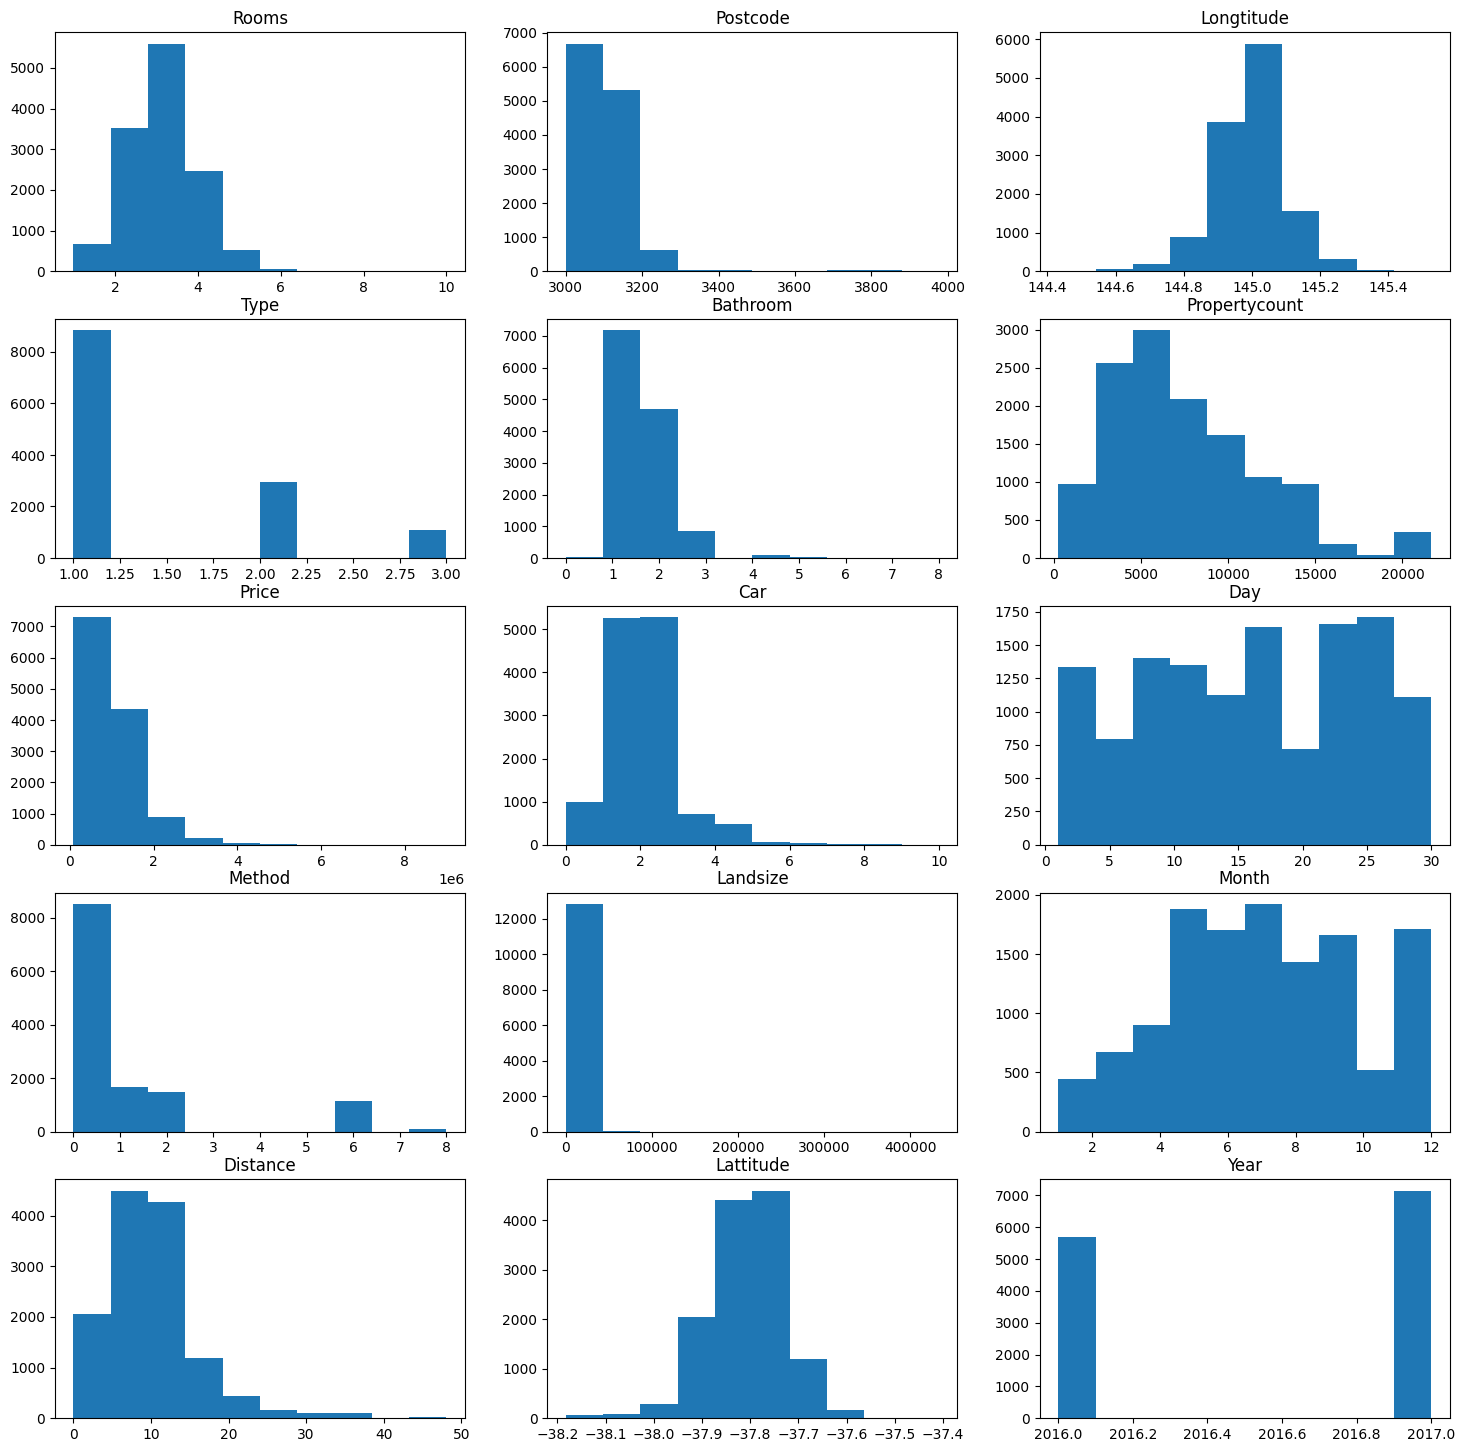

In [ ]:
plt.rcParams["figure.figsize"] = (18, 18)
figure, axis = plt.subplots(5, 3)

columns = melbourne_df.columns
for i in range(0, 5):
  for j in range(0,3):
   col_index = i+5*j
   axis[i, j].hist(melbourne_df[columns[col_index]])
   axis[i, j].set_title(columns[col_index])


#Outlier Removal

In [ ]:
columns = melbourne_df.columns
for col in columns:
  avg = np.mean(melbourne_df[col])
  median = np.median(melbourne_df[col])
  std = np.std(melbourne_df[col])
  print("Feature {:s} Avg {:.2}  Median {:.2} Std {:.2}".format(col, avg, median, std))

Feature Rooms Avg 2.9  Median 3.0 Std 0.94
Feature Type Avg 1.4  Median 1.0 Std 0.64
Feature Price Avg 1.1e+06  Median 9e+05 Std 6.3e+05
Feature Method Avg 0.94  Median 0.0 Std 1.8
Feature Distance Avg 1e+01  Median 9.3 Std 5.9
Feature Postcode Avg 3.1e+03  Median 3.1e+03 Std 9.2e+01
Feature Bathroom Avg 1.5  Median 1.0 Std 0.68
Feature Car Avg 1.6  Median 2.0 Std 0.96
Feature Landsize Avg 5.6e+02  Median 4.4e+02 Std 4.1e+03
Feature Lattitude Avg -3.8e+01  Median -3.8e+01 Std 0.08
Feature Longtitude Avg 1.4e+02  Median 1.5e+02 Std 0.11
Feature Propertycount Avg 7.5e+03  Median 6.6e+03 Std 4.4e+03
Feature Day Avg 1.6e+01  Median 1.6e+01 Std 8.5
Feature Month Avg 7.1  Median 7.0 Std 2.6
Feature Year Avg 2e+03  Median 2e+03 Std 0.5


In [ ]:
def remove_outliers(col_name, melbourne_df):
  threshold_high = np.median(melbourne_df[col_name]) + 4*np.std(melbourne_df[col_name]) #when running this change it to three for both and see what happens
  threshold_low = np.median(melbourne_df[col_name]) - 4*np.std(melbourne_df[col_name])


  num_not_in_threshold = sum(melbourne_df[col_name] > threshold_high) + sum(melbourne_df[col_name] < threshold_low)
  print("num not in threshold for", col, num_not_in_threshold)
  melbourne_df = melbourne_df[melbourne_df[col_name] < threshold_high]
  melbourne_df = melbourne_df[melbourne_df[col_name] > threshold_low]
  return melbourne_df

for col in columns:
  melbourne_df = remove_outliers(col, melbourne_df)
  print('shape of dataset', melbourne_df.shape)


num not in threshold for Rooms 13
shape of dataset (12829, 15)
num not in threshold for Type 0
shape of dataset (12829, 15)
num not in threshold for Price 106
shape of dataset (12723, 15)
num not in threshold for Method 89
shape of dataset (12634, 15)
num not in threshold for Distance 130
shape of dataset (12504, 15)
num not in threshold for Postcode 96
shape of dataset (12408, 15)
num not in threshold for Bathroom 91
shape of dataset (12317, 15)
num not in threshold for Car 61
shape of dataset (12256, 15)
num not in threshold for Landsize 12
shape of dataset (12244, 15)
num not in threshold for Lattitude 0
shape of dataset (12244, 15)
num not in threshold for Longtitude 41
shape of dataset (12203, 15)
num not in threshold for Propertycount 0
shape of dataset (12203, 15)
num not in threshold for Day 0
shape of dataset (12203, 15)
num not in threshold for Month 0
shape of dataset (12203, 15)
num not in threshold for Year 0
shape of dataset (12203, 15)


With this outlier removal, let us see the distributions for the features again!

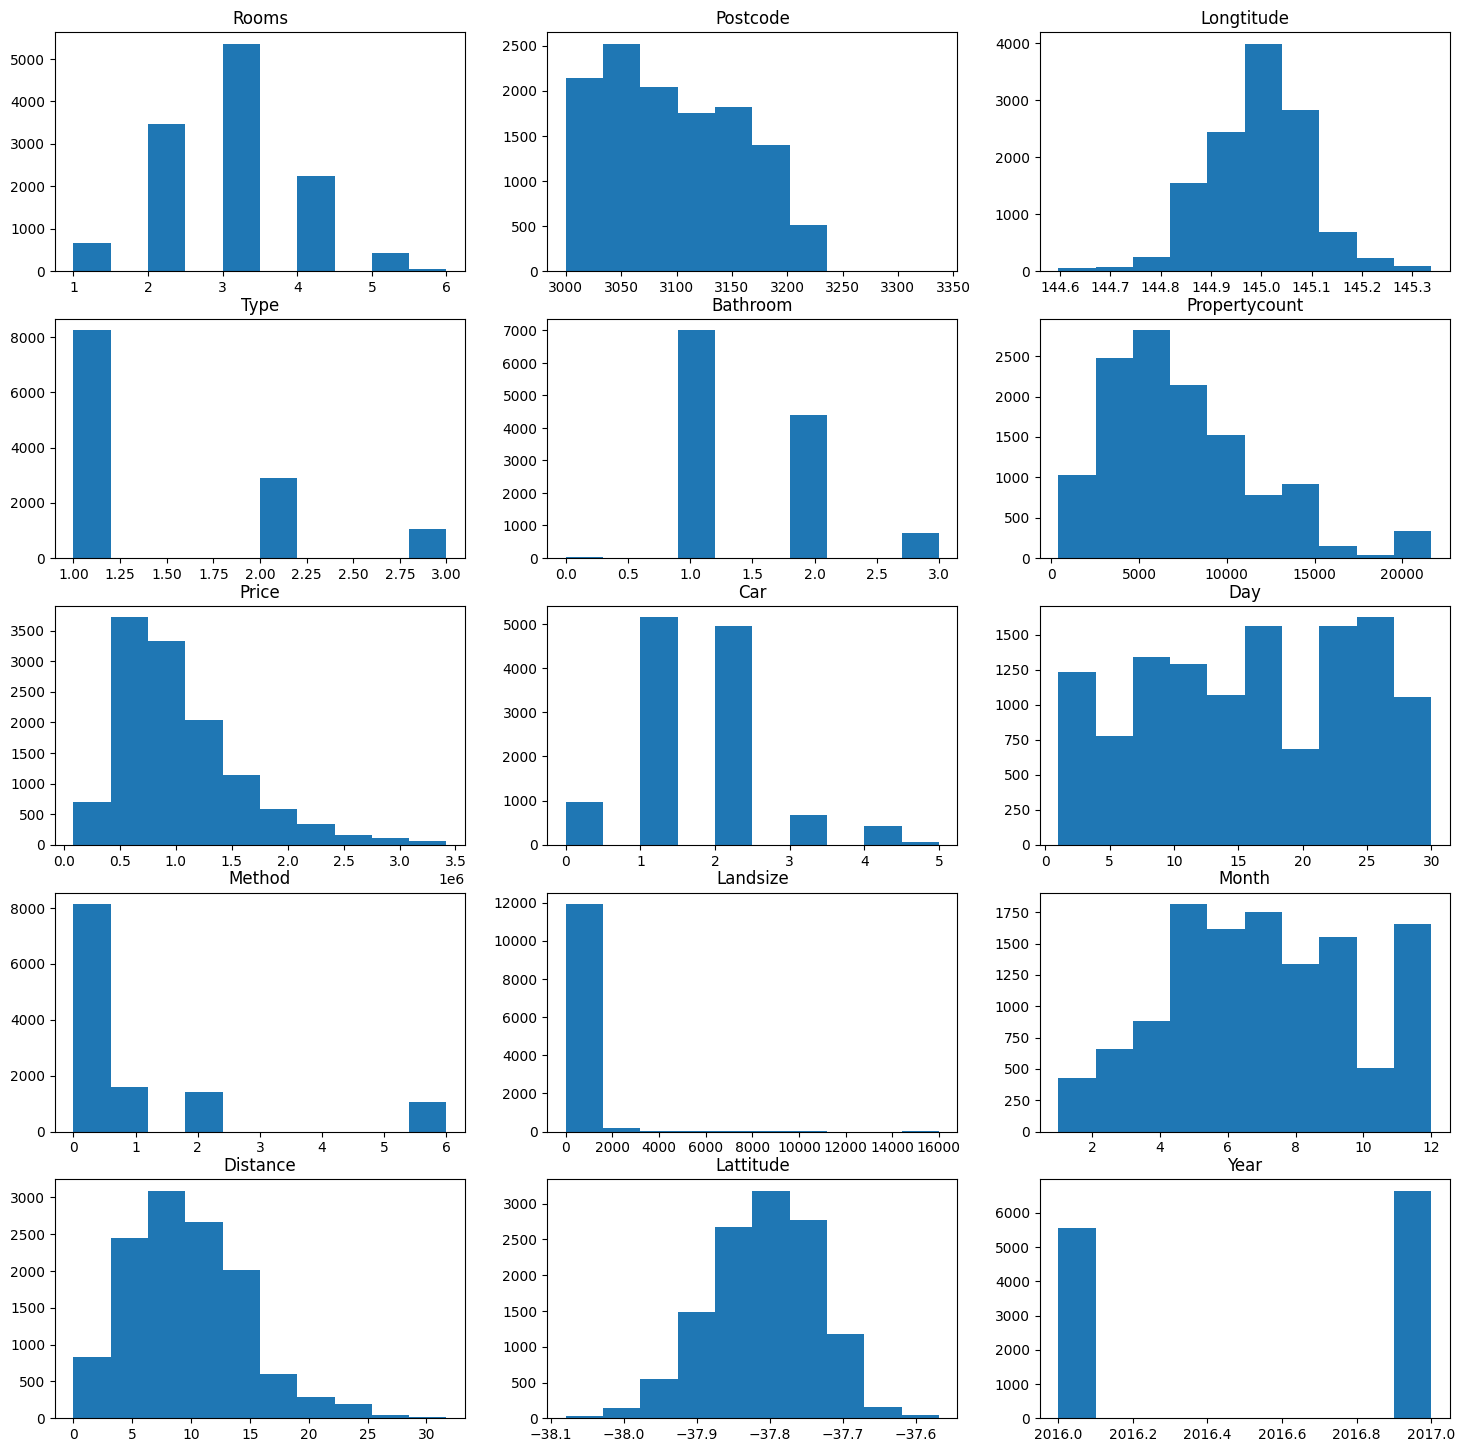

In [ ]:
plt.rcParams["figure.figsize"] = (18, 18)
figure, axis = plt.subplots(5, 3)

columns = melbourne_df.columns
for i in range(0, 5):
  for j in range(0,3):
   col_index = i+5*j
   axis[i, j].hist(melbourne_df[columns[col_index]])
   axis[i, j].set_title(columns[col_index])

#Data Analysis

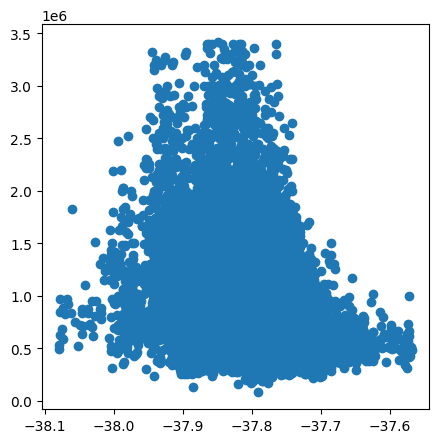

In [ ]:
plt.rcParams["figure.figsize"] = (5, 5)
plt.scatter(melbourne_df['Lattitude'], melbourne_df['Price'])


[[1.        0.2276062]
 [0.2276062 1.       ]]


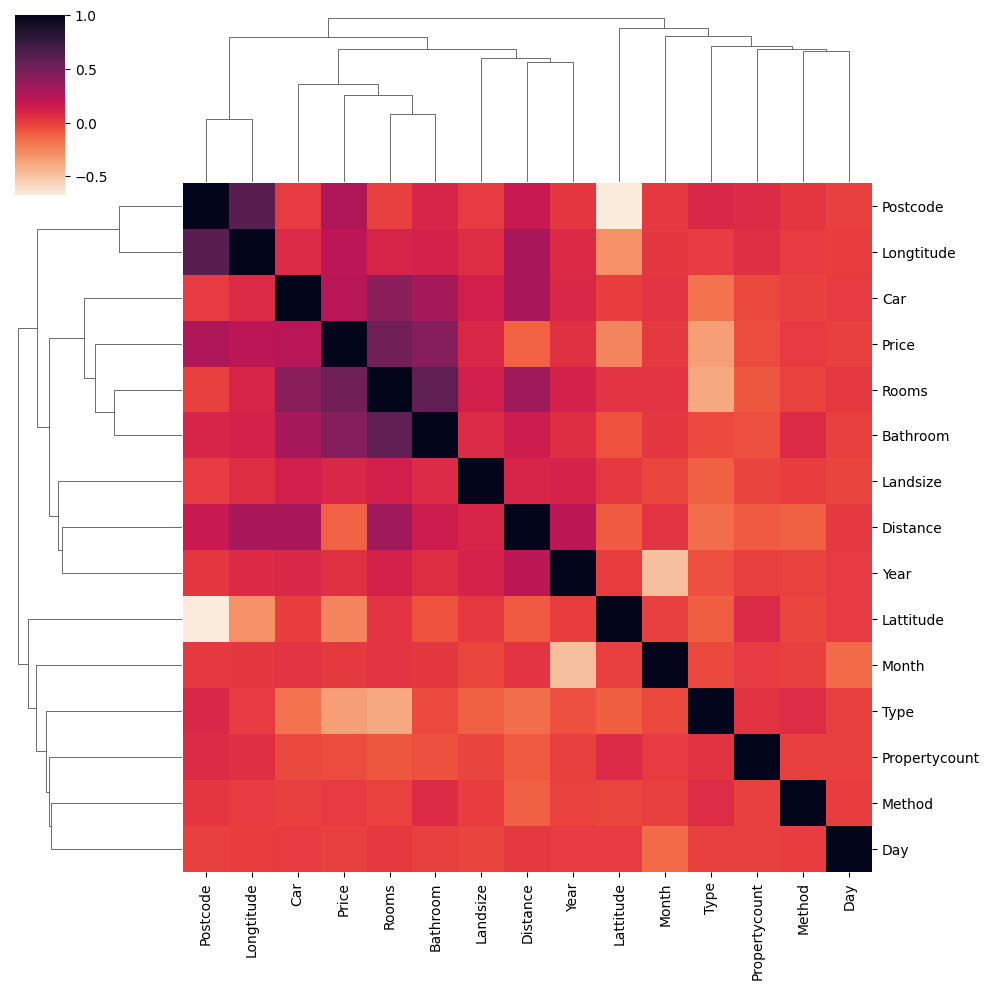

In [ ]:
x=np.corrcoef(melbourne_df['Longtitude'],melbourne_df['Price'])
print(x)


sns_plot = sns.clustermap(melbourne_df.corr(), cmap="rocket_r")

The correlation map above shows the relative correlations between different features. Below we can simply print the correlation values for all the features with the target column (Price).

In [ ]:
print(abs(melbourne_df.corr()).sort_values(by=["Price"],ascending=False)["Price"])

Price            1.000000
Rooms            0.518725
Bathroom         0.433295
Type             0.344140
Postcode         0.274621
Lattitude        0.246303
Car              0.236972
Longtitude       0.227606
Distance         0.121697
Landsize         0.089609
Year             0.050633
Propertycount    0.048532
Month            0.015769
Method           0.006450
Day              0.004443
Name: Price, dtype: float64


As expected, we note that features like day and month do not matter as much as some of our other features. Interestingly enough, the number of rooms has the highest correlation with price.

#Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(melbourne_df.values)
scaled_features_df = pd.DataFrame(scaled_features, index=melbourne_df.index, columns=melbourne_df.columns)
print(scaled_features_df.head())


      Rooms      Type     Price    Method  Distance  Postcode  Bathroom  \
0 -0.953156 -0.637114  0.822526 -0.515012 -1.480126 -0.493713 -0.787633   
1 -0.953156 -0.637114  0.002438 -0.515012 -1.480126 -0.493713 -0.787633   
2  0.137966 -0.637114  0.794882  0.066204 -1.480126 -0.493713  0.835106   
3  0.137966 -0.637114 -0.338498  0.647420 -1.480126 -0.493713  0.835106   
5 -0.953156 -0.637114 -0.170794 -0.515012 -1.480126 -0.493713 -0.787633   

        Car  Landsize  Lattitude  Longtitude  Propertycount       Day  \
0 -0.632552 -0.411690   0.114260    0.038344      -0.781354 -1.532829   
1 -1.771724 -0.481243  -0.000172   -0.012753      -0.781354 -1.415238   
2 -1.771724 -0.514508  -0.019474   -0.002534      -0.781354 -1.415238   
3 -0.632552 -0.574989   0.151485    0.023015      -0.781354 -1.415238   
5 -1.771724 -0.443443   0.052219    0.006664      -0.781354 -1.062464   

      Month      Year  
0  1.914955 -1.093784  
1 -1.944877 -1.093784  
2 -1.558894  0.914257  
3 -1.558894  0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
X = scaled_features_df.drop(columns = ['Price'])
y = scaled_features_df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
regressor = RandomForestRegressor(n_estimators = 32, random_state=0)
regressor = regressor.fit(X_train, y_train)
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Decision Tree Regressor: Accuracy on train {:.3}, test {:.3}".format(mse_train, mse_test))



Decision Tree Regressor: Accuracy on train 0.0297, test 0.19


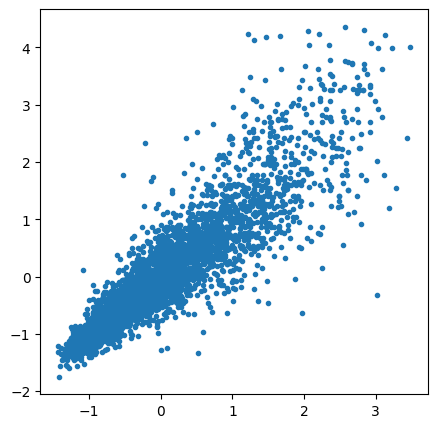

In [ ]:

plt.plot(y_pred_test,y_test,".")